In [ ]:
import tweepy
import pandas as pd
import requests
import io
import json
import os
import glob
import numpy as np
import re
from datetime import datetime as dt
import matplotlib.pyplot as plt

# Analysis
 - Which dog breeds get the most likes by users (favourites and retweets)
 - Which dog breeds get the best ratings by the WeRateDogs
 - How does the account popularity develop over time

#### Which dog breeds get posted the most and which dog breeds get the most likes by users?

In [127]:
tweets = pd.read_csv("tweets_clean.csv")
dogs = pd.read_csv("dog_predictions_clean.csv")

In [128]:
dogs.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True


In [129]:
# Merge the two dataframes
df = tweets.merge(dogs, how="inner", on = "tweet_id")

In [130]:
# Check the amount of dogs for each breed
dog_numbers = df.query("p1_dog == True").groupby(df.p1).count()

In [131]:
dog_numbers.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,follower_count,favourites_of_user_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
p1,,,,,,,,,,,,,,,,,,,,,
Afghan Hound,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


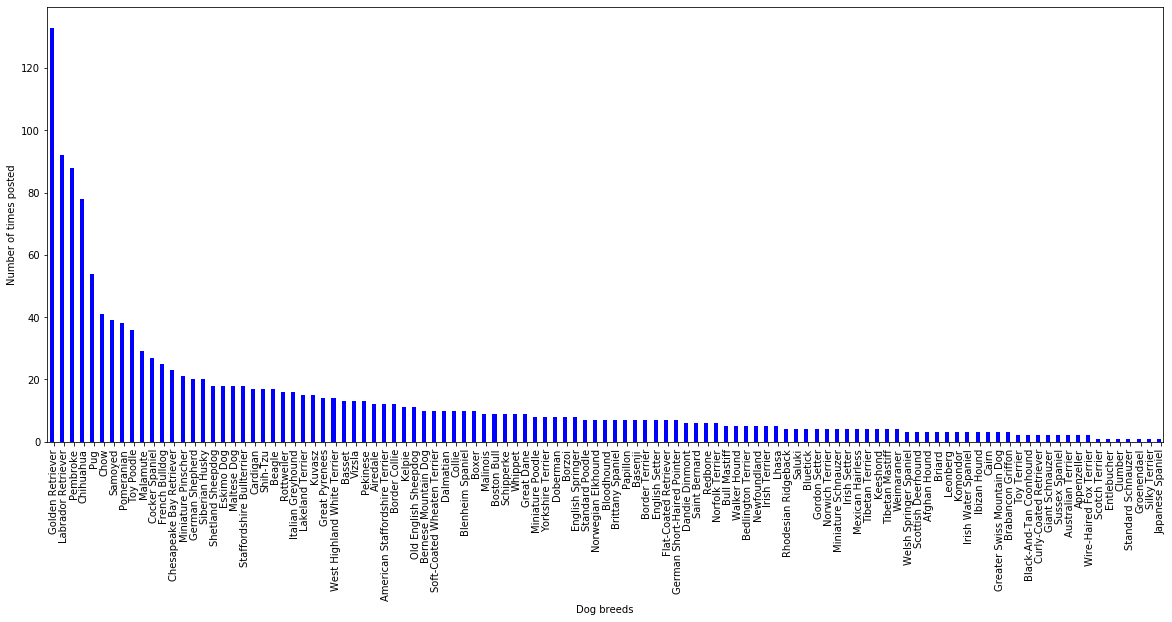

In [132]:
fig = plt.figure()

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.4

dog_numbers.sort_values(by = "tweet_id", ascending = False).tweet_id.plot(kind='bar', color='blue', ax=ax, width=width, position=1, figsize = (20,8))


ax.set_ylabel('Number of times posted')
ax.set_xlabel('Dog breeds')


plt.show()

In [133]:
fav_dogs = df.query("p1_dog == True").groupby(df.p1).sum()[["retweet_count", "favourite_of_post_count"]]

In [137]:
rel_fav_dogs = fav_dogs.copy()

rel_fav_dogs["Relative favourites"] = fav_dogs["favourite_of_post_count"]/dog_numbers["tweet_id"]
rel_fav_dogs["Relative retweets"] = fav_dogs["retweet_count"]/dog_numbers["tweet_id"]
rel_fav_dogs = rel_fav_dogs.sort_values(by = "Relative favourites", ascending = False)

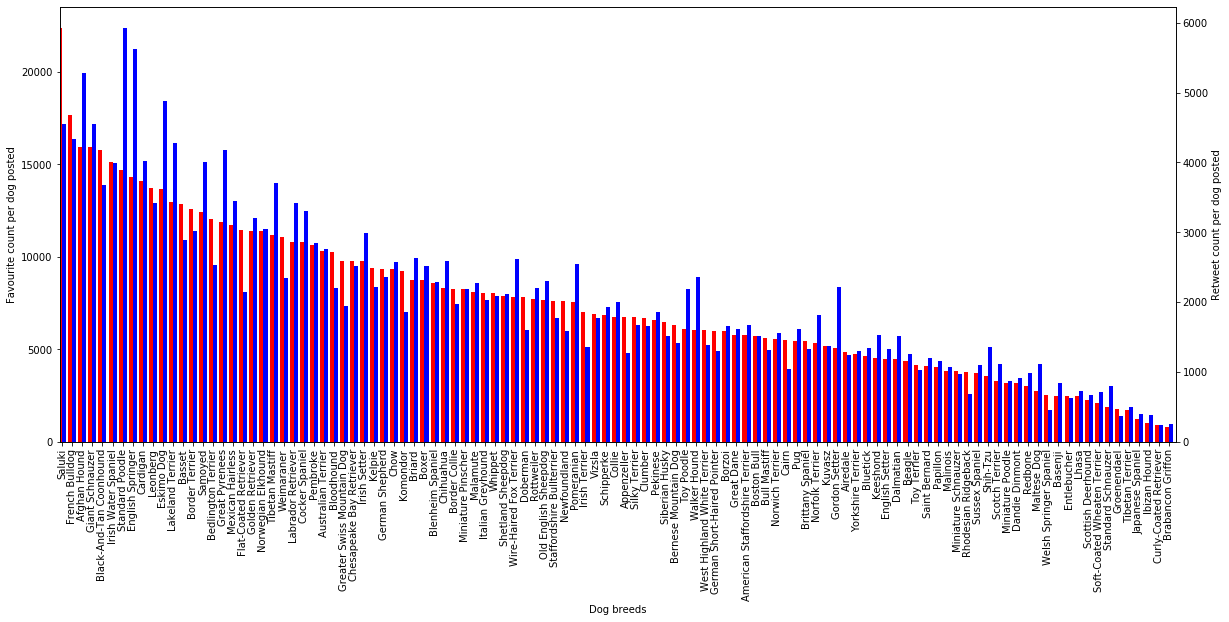

In [141]:
fig = plt.figure()

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

rel_fav_dogs["Relative favourites"].plot(kind='bar', color='red', ax=ax, width=width, position=1, figsize = (20,8))
rel_fav_dogs["Relative retweets"].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax2.set_ylabel('Retweet count per dog posted')
ax.set_ylabel('Favourite count per dog posted')
ax.set_xlabel('Dog breeds')


plt.show()

# Sources

Two axis barplot: https://stackoverflow.com/questions/24183101/pandas-bar-plot-with-two-bars-and-two-y-axis